In [107]:
# importing pandas library
import pandas as pd 

In [109]:
df=pd.read_excel(r"C:\Users\daysi\OneDrive\Desktop\Asil\DataAnalysis\Datasets\Jupyy.xlsx")

In [110]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01 00:00:00,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03 00:00:00,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03 00:00:00,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02 00:00:00,10:37:00,Ewallet,5.3,0.48


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  float64
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 863.9+ KB


In [115]:
df.describe()

,invoice_id,unit_price,quantity,rating,profit_margin
count,10051.000000,10020.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,50.630053,2.353493,5.825659,0.393791
std,2901.174372,21.197783,1.602658,1.763991,0.090669
min,1.000000,10.080000,1.000000,3.000000,0.180000
25%,2513.500000,32.000000,1.000000,4.000000,0.330000
50%,5026.000000,51.000000,2.000000,6.000000,0.330000
75%,7538.500000,69.000000,3.000000,7.000000,0.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000


In [117]:
df.shape

(10051, 11)

In [119]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [121]:
df.duplicated().sum()

51

In [123]:
# Convert date to datetime, handling multiple formats
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10051 non-null  int64         
 1   Branch          10051 non-null  object        
 2   City            10051 non-null  object        
 3   category        10051 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10051 non-null  datetime64[ns]
 7   time            10051 non-null  object        
 8   payment_method  10051 non-null  object        
 9   rating          10051 non-null  float64       
 10  profit_margin   10051 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 863.9+ KB


In [127]:
df['revenue'] = df['unit_price'] * df['quantity']

In [129]:
df['profit'] = df['revenue'] * df['profit_margin']

In [131]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,profit
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83,250.9584
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,76.40,36.6720
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,107.0223
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,153.7008
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17,290.0016


In [133]:
# Ensure numeric columns are properly typed
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['profit_margin'] = pd.to_numeric(df['profit_margin'], errors='coerce')

In [135]:
# 1. Sales Performance Analysis
print("1. Sales Performance Analysis")
# Total Revenue by Branch
branch_revenue = df.groupby('Branch')['revenue'].sum().sort_values(ascending=False)
print("Top 5 Branches by Revenue:\n", branch_revenue.head())

1. Sales Performance Analysis
Top 5 Branches by Revenue:
 Branch
WALM074    25732.42
WALM009    25712.34
WALM003    25001.56
WALM030    24690.60
WALM058    24650.37
Name: revenue, dtype: float64


In [137]:
# Total Revenue by City
city_revenue = df.groupby('City')['revenue'].sum().sort_values(ascending=False)
print("\nTop 5 Cities by Revenue:\n", city_revenue.head())


Top 5 Cities by Revenue:
 City
Weslaco        46644.79
Waxahachie     40966.33
Plano          25712.34
San Antonio    25001.56
Richardson     24690.60
Name: revenue, dtype: float64


In [139]:
# Revenue by Category
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:\n", category_revenue)


Revenue by Category:
 category
Home and lifestyle        491996.06
Fashion accessories       491833.90
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Health and beauty          46851.18
Name: revenue, dtype: float64


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

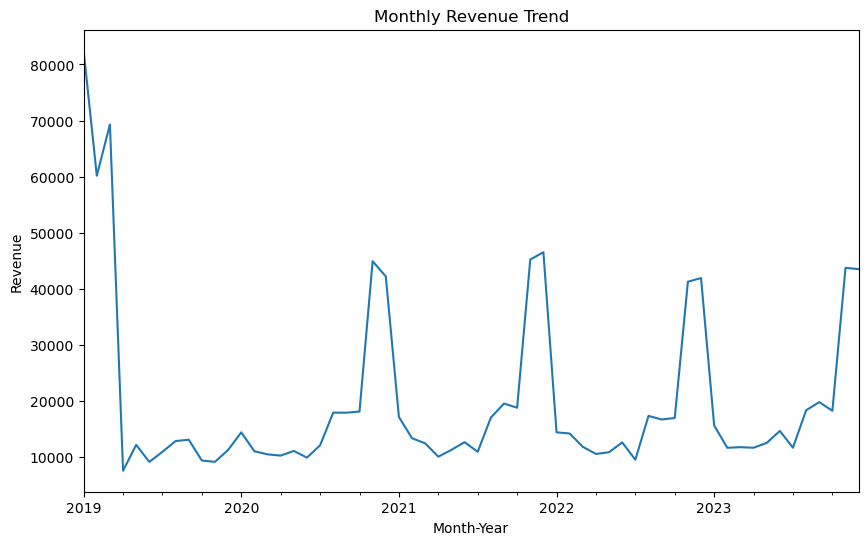

In [145]:
# Sales Trends Over Time (Monthly)
df['month_year'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month_year')['revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(title='Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.show()

In [147]:
# 2. Profitability Analysis
print("\n2. Profitability Analysis")
# Profit by Branch
branch_profit = df.groupby('Branch')['profit'].sum().sort_values(ascending=False)
print("Top 5 Branches by Profit:\n", branch_profit.head())


2. Profitability Analysis
Top 5 Branches by Profit:
 Branch
WALM009    12341.9232
WALM030    11851.4880
WALM003    11481.1788
WALM029    11301.7632
WALM046    10304.6352
Name: profit, dtype: float64


In [149]:
# Profit Margin by Category
category_profit_margin = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
print("\nAverage Profit Margin by Category:\n", category_profit_margin)


Average Profit Margin by Category:
 category
Food and beverages        0.400345
Health and beauty         0.400263
Home and lifestyle        0.394598
Electronic accessories    0.393150
Fashion accessories       0.393001
Sports and travel         0.382229
Name: profit_margin, dtype: float64


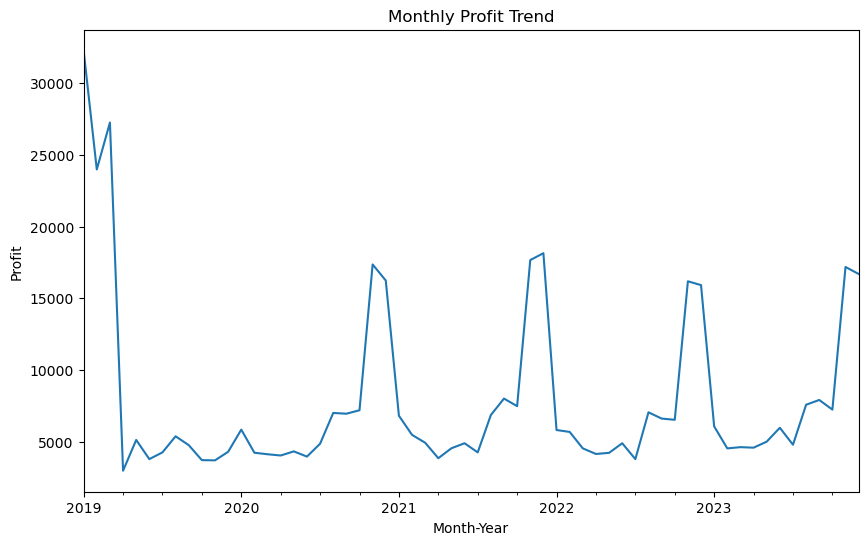

In [151]:
# Profit Trends Over Time
monthly_profit = df.groupby('month_year')['profit'].sum()
plt.figure(figsize=(10, 6))
monthly_profit.plot(title='Monthly Profit Trend')
plt.xlabel('Month-Year')
plt.ylabel('Profit')
plt.show()


3. Customer Behavior Insights
Payment Method Distribution:
 payment_method
Credit card    4260
Ewallet        3911
Cash           1880
Name: count, dtype: int64


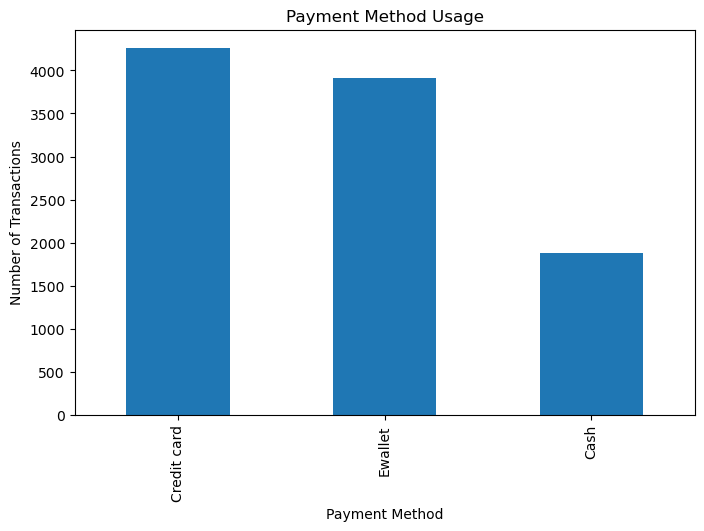

In [153]:
# 3. Customer Behavior Insights
print("\n3. Customer Behavior Insights")
# Payment Method Preferences
payment_counts = df['payment_method'].value_counts()
print("Payment Method Distribution:\n", payment_counts)
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', title='Payment Method Usage')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

In [155]:
# Average Transaction Size by Branch
avg_transaction = df.groupby('Branch')['revenue'].mean().sort_values(ascending=False)
print("\nTop 5 Branches by Avg Transaction Size:\n", avg_transaction.head())


Top 5 Branches by Avg Transaction Size:
 Branch
WALM017    182.733026
WALM042    174.057969
WALM062    163.229600
WALM066    162.672800
WALM095    162.622289
Name: revenue, dtype: float64


In [157]:
# Quantity Purchased by Category
category_quantity = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
print("\nTotal Quantity by Category:\n", category_quantity)


Total Quantity by Category:
 category
Fashion accessories       9702.0
Home and lifestyle        9660.0
Electronic accessories    1494.0
Food and beverages         952.0
Sports and travel          920.0
Health and beauty          854.0
Name: quantity, dtype: float64


In [159]:
# 4. Product and Pricing Analysis
print("\n4. Product and Pricing Analysis")
# Average Unit Price by Category
avg_price_category = df.groupby('category')['unit_price'].mean().sort_values(ascending=False)
print("Average Unit Price by Category:\n", avg_price_category)


4. Product and Pricing Analysis
Average Unit Price by Category:
 category
Sports and travel         56.993253
Food and beverages        56.008851
Health and beauty         54.854474
Electronic accessories    51.636683
Home and lifestyle        50.484645
Fashion accessories       50.105248
Name: unit_price, dtype: float64


In [161]:
# Price vs. Quantity Correlation
price_quantity_corr = df['unit_price'].corr(df['quantity'])
print("\nCorrelation between Unit Price and Quantity:", price_quantity_corr)


Correlation between Unit Price and Quantity: 0.06130758009640929


In [163]:
# Top-Selling Products by Volume
top_volume = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
print("\nTop Categories by Volume:\n", top_volume.head())


Top Categories by Volume:
 category
Fashion accessories       9702.0
Home and lifestyle        9660.0
Electronic accessories    1494.0
Food and beverages         952.0
Sports and travel          920.0
Name: quantity, dtype: float64


In [165]:
# 5. Customer Satisfaction Insights
print("\n5. Customer Satisfaction Insights")
# Average Rating by Branch
branch_rating = df.groupby('Branch')['rating'].mean().sort_values(ascending=False)
print("Top 5 Branches by Average Rating:\n", branch_rating.head())


5. Customer Satisfaction Insights
Top 5 Branches by Average Rating:
 Branch
WALM004    7.001667
WALM076    6.774667
WALM059    6.732911
WALM026    6.678082
WALM034    6.671429
Name: rating, dtype: float64


In [167]:
# Rating by Category
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:\n", category_rating)


Average Rating by Category:
 category
Food and beverages        7.113218
Health and beauty         7.003289
Sports and travel         6.916265
Electronic accessories    5.912172
Fashion accessories       5.778161
Home and lifestyle        5.737338
Name: rating, dtype: float64


In [169]:
# Rating vs. Payment Method
payment_rating = df.groupby('payment_method')['rating'].mean()
print("\nAverage Rating by Payment Method:\n", payment_rating)


Average Rating by Payment Method:
 payment_method
Cash           5.403191
Credit card    5.415634
Ewallet        6.475352
Name: rating, dtype: float64



6. Temporal Analysis


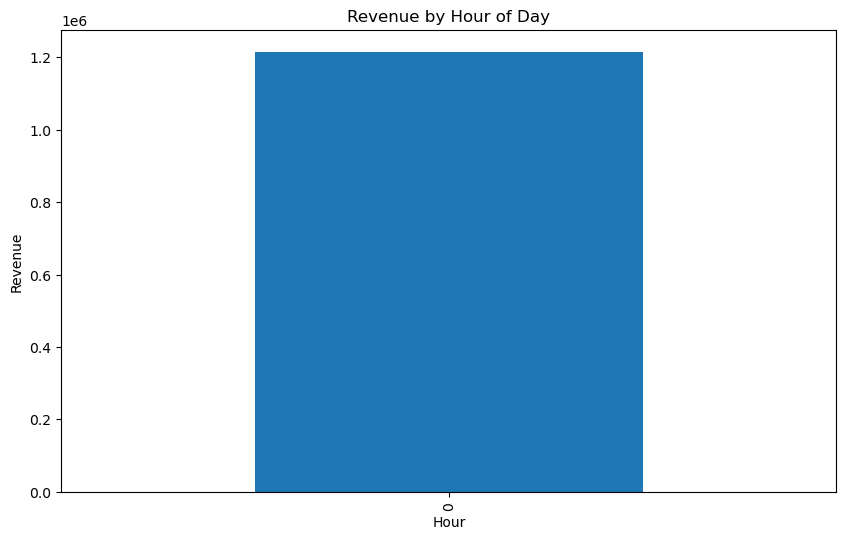

In [173]:
# 6. Temporal Analysis
print("\n6. Temporal Analysis")
# Sales by Time of Day
df['hour'] = df['date'].dt.hour
hourly_revenue = df.groupby('hour')['revenue'].sum()
plt.figure(figsize=(10, 6))
hourly_revenue.plot(kind='bar', title='Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()

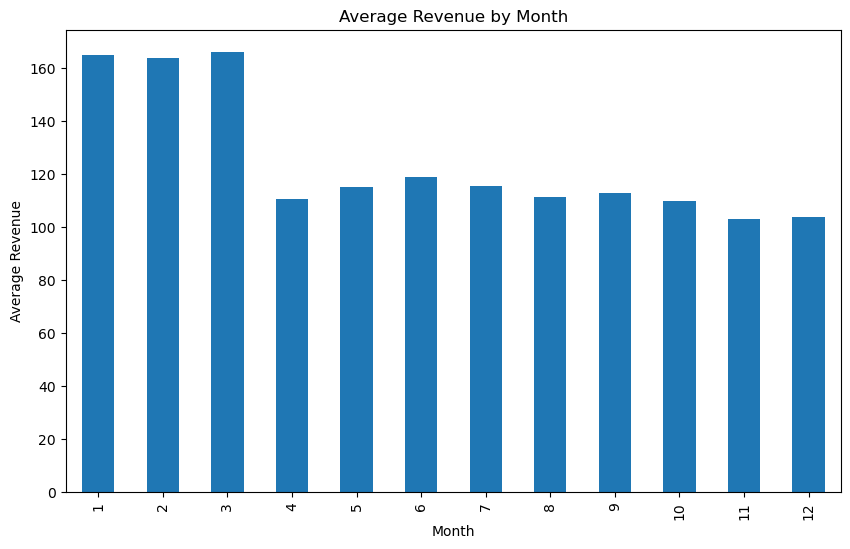

In [175]:
# Seasonal Patterns (Monthly Average)
monthly_avg_revenue = df.groupby(df['date'].dt.month)['revenue'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_revenue.plot(kind='bar', title='Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

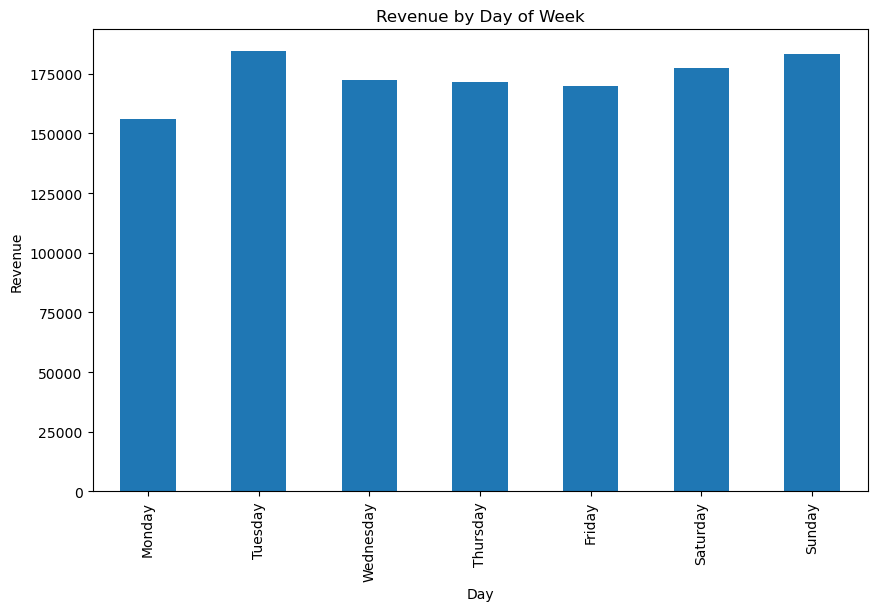

In [179]:
 #  Day of Week Analysis
df['day_of_week'] = df['date'].dt.day_name()
day_revenue = df.groupby('day_of_week')['revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
day_revenue.plot(kind='bar', title='Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

In [183]:
 # 7. Geographic Insights
print("\n7. Geographic Insights")
# City Performance Comparison
city_performance = df.groupby('City').agg({'revenue': 'sum', 'profit': 'sum', 'rating': 'mean'}).sort_values(by='revenue', ascending=False)
print("Top 5 Cities by Revenue, Profit, and Rating:\n", city_performance.head())


7. Geographic Insights
Top 5 Cities by Revenue, Profit, and Rating:
               revenue      profit    rating
City                                       
Weslaco      46644.79  15392.7807  5.179449
Waxahachie   40966.33  13518.8889  5.218635
Plano        25712.34  12341.9232  5.342437
San Antonio  25001.56  11481.1788  5.363102
Richardson   24690.60  11851.4880  5.400429



8. Operational Efficiency


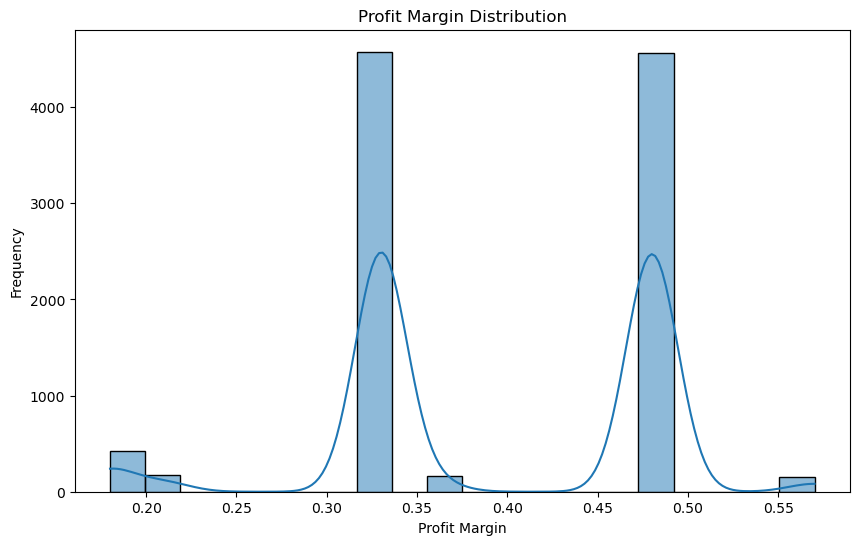

In [185]:
# 8. Operational Efficiency
print("\n8. Operational Efficiency")
# Profit Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['profit_margin'], bins=20, kde=True)
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

In [187]:
# Low-Performing Transactions
low_performing = df[(df['rating'] < 5) | (df['profit'] < 100)].groupby('Branch').size()
print("\nBranches with Low-Performing Transactions:\n", low_performing.sort_values(ascending=False).head())


Branches with Low-Performing Transactions:
 Branch
WALM058    237
WALM009    222
WALM030    220
WALM069    218
WALM084    207
dtype: int64


In [189]:
# 9. Correlation and Advanced Insights
print("\n9. Correlation and Advanced Insights")
# Price vs. Rating Correlation
price_rating_corr = df['unit_price'].corr(df['rating'])
print("Correlation between Unit Price and Rating:", price_rating_corr)


9. Correlation and Advanced Insights
Correlation between Unit Price and Rating: 0.01899066131268316


In [191]:
# Profit Margin vs. Rating
margin_rating_corr = df['profit_margin'].corr(df['rating'])
print("Correlation between Profit Margin and Rating:", margin_rating_corr)

Correlation between Profit Margin and Rating: 0.06614854133697572


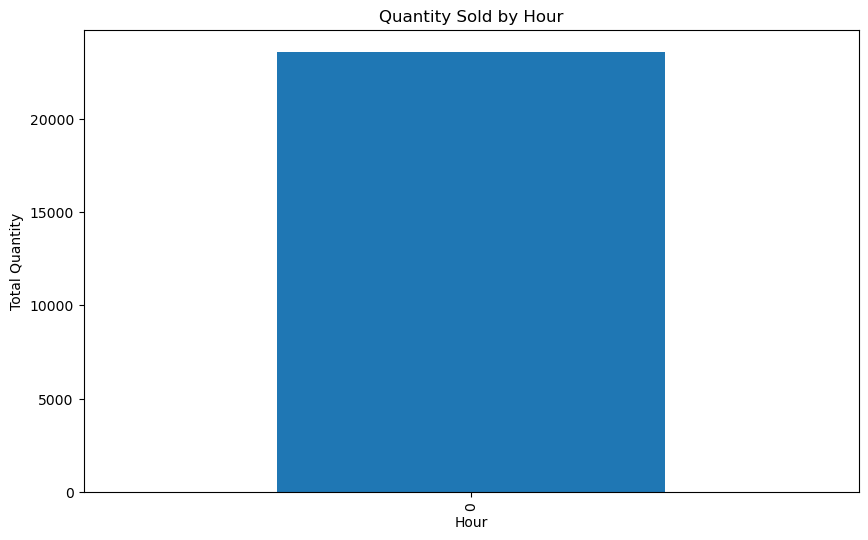

In [195]:
# Quantity vs. Time of Day
quantity_by_hour = df.groupby('hour')['quantity'].sum()
plt.figure(figsize=(10, 6))
quantity_by_hour.plot(kind='bar', title='Quantity Sold by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Quantity')
plt.show()

In [197]:
# 10. Predictive and Strategic Insights
print("\n10. Predictive and Strategic Insights")
# Simple Forecasting (Last 12 months avg for next month)
last_12_months = df[df['month_year'] > df['month_year'].max() - 12]['revenue'].mean()
print("Estimated Revenue for Next Month (based on last 12 months avg):", last_12_months)


10. Predictive and Strategic Insights
Estimated Revenue for Next Month (based on last 12 months avg): 104.20678874497544


In [199]:
# Branch Expansion Potential (Top cities by combined metrics)
expansion_potential = city_performance[city_performance['rating'] > 7].sort_values(by='profit', ascending=False)
print("\nTop Cities for Expansion (High Profit and Rating):\n", expansion_potential.head())


Top Cities for Expansion (High Profit and Rating):
         revenue    profit    rating
City                               
Austin  7565.65  3631.512  7.001667


In [201]:
# Category Expansion (Growing categories)
category_growth = df.groupby(['category', 'month_year'])['revenue'].sum().unstack().pct_change(axis=1).mean(axis=1).sort_values(ascending=False)
print("\nCategories with Highest Average Monthly Growth:\n", category_growth.head())


Categories with Highest Average Monthly Growth:
 category
Electronic accessories    2.547003
Home and lifestyle        0.148185
Fashion accessories       0.127387
Sports and travel         0.061701
Food and beverages        0.006593
dtype: float64


C:\Users\daysi\AppData\Local\Temp\ipykernel_9024\2289549251.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  category_growth = df.groupby(['category', 'month_year'])['revenue'].sum().unstack().pct_change(axis=1).mean(axis=1).sort_values(ascending=False)
